In [1]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

np.random.seed(3093453)
sns.set(context="talk", style="darkgrid")

In [12]:
cwd = os.getcwd()
folder = "clean+translated-data"
file = "clean-de.csv"
path = "/".join( (cwd, folder, file) )

df = pd.read_csv(path, index_col=0)
df["lang"] = "de"

files = os.listdir(folder)
files = [file for file in files if re.match(r'clean-[a-z]{2}-de.csv', file)]

for file in files:
    path = "/".join( (cwd, folder, file) )
    data = pd.read_csv(path, index_col=0)
    data["lang"] = file[6:8]
    
    df = pd.concat([df, data])

del(data)
df.reset_index(inplace=True)
df

,index,Textstelle,Metapher,Kandidat,Nein,Metapher?,Fokus,Rahmen,Annotator,orig,lang
0,0,Der politische Körper verwendet in beiden Fäll...,3,1,0,Metapher,"['Zähnen und Krallen', 'Zähnen und Krallen', n...","['der politische Körper', 'der politische Körp...","['B', 'K', 'A', 'GoldStandard']","""Der politische Körper verwendet in beiden Fä...",de
1,1,Immer noch wird durch die protestantische Lehr...,0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","['B', 'K', 'A', 'GoldStandard']","""Immer noch wird durch die protestantische Le...",de
2,2,"Kein Zweifel, schreibt Alb. Schaeffle, vorauss...",0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","['B', 'K', 'A', 'GoldStandard']","""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",de
3,3,Mit je weiterem Blick wir die Stoffwelt zu übe...,1,3,0,Metaphernkandidat,"[nan, 'Stoffwelt, verzwergt und entkleidet', n...","[nan, 'unser praktisches Ideal', nan, nan]","['B', 'K', 'A', 'GoldStandard']","""Mit je weiterem Blick wir die Stoffwelt zu ü...",de
4,4,Solange das Menschengeschlecht seinen Zerstöre...,0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","['B', 'K', 'A', 'GoldStandard']","""Solange das Menschengeschlecht seinen Zerstö...",de
...,...,...,...,...,...,...,...,...,...,...,...
3990,794,Sie hat durchweg Naturwissenschaft in dem von ...,0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","['T', 'P', 'B', 'GoldStandard']",verlaufs; sie hat Naturforschung in dem von un...,da
3991,795,Wenn wir uns ein Prinzip ausdenken und darauf ...,1,3,0,Metaphernkandidat,"[nan, nan, 'verstellbare Puppen', nan]","[nan, nan, 'staatliche Menschenverhältnisse', ...","['P', 'K', 'B', 'GoldStandard']",wenn wir uns ein Prinzip denken und auf Grund ...,da
3992,796,sieht man von dem Schimpfwort Rechtsphilosophi...,3,1,0,Metapher,"['schwindsüchtig ist', nan, 'schwindsüchtig', ...","['daß eine Philosophie', nan, 'eine Philosophi...","['P', 'K', 'B', 'GoldStandard']",wenn wir von dem schlechten Worte »Rechtsphilo...,da
3993,797,"Die Macht der Regierung, die verschiedenen Mot...",0,2,0,NaN,"[nan, nan]","[nan, nan]","['P', 'B']","»Die Macht, die das Kabinett hat, auf die vers...",da


In [13]:
da = df[(df["Metapher?"] == "Metapher") & (df.lang == "da") & (["GoldStandard" in annot for annot in df.Annotator])]
da

,index,Textstelle,Metapher,Kandidat,Nein,Metapher?,Fokus,Rahmen,Annotator,orig,lang
3196,0,In beiden Fällen verwendet die Politik den grö...,3,1,0,Metapher,"['Zähnen und Krallen', 'Zähnen und Krallen', n...","['der politische Körper', 'der politische Körp...","['B', 'K', 'A', 'GoldStandard']","""Der politische Körper verwendet in beiden Fä...",da
3213,17,Aber zur Zeit des Heraklit wurde die Saat dies...,4,0,0,Metapher,"['der vergeblich ausgestreute Same', 'Same ......","['zu dieser Erkenntnis', 'zu dieser Erkenntnis...","['B', 'K', 'A', 'GoldStandard']",Aber zu Heraklits Zeit wurde der Same zu dies...,da
3220,24,"Bei ihnen stand alles auf einer Fläche, alles ...",4,1,0,Metapher,"['in ein Gewebe verwoben', 'irdischen Zettel',...","['alles', 'das Gute und Heilige', nan, 'nur ei...","['B', 'A', 'P', 'K', 'GoldStandard']","Alles stand bei ihnen auf einer Fläche, alles...",da
3222,26,"Die vierte Operation, die wir erwähnen möchten...",5,0,0,Metapher,"['Werkstatt', 'Werkstatt', 'der Natur', 'Werks...","['der Natur', 'Der Natur', 'in die Werkstatt e...","['B', 'A', 'P', 'K', 'GoldStandard']",Als vierten Trieb möchten wir das Kausalitäts...,da
3228,32,"Auch er ist ein Kenner des Römischen Reiches, ...",5,0,0,Metapher,"['Verholzung oder Versteinerung', 'Verholzung ...","['der christlichen Kirchen', 'der christlichen...","['B', 'A', 'P', 'K', 'GoldStandard']",Auch er ist ein genauer Kenner gerade der röm...,da
...,...,...,...,...,...,...,...,...,...,...,...
3973,777,"Welch ein Wunder, dass die Weisheit Israels ei...",3,1,0,Metapher,['die geheime Werkstatt des irdischen Ursprung...,"['im weiblichen Uterus', nan, 'die geheime Wer...","['K', 'B', 'P', 'GoldStandard']","[3]: Was Wunder, daß die israelitische Weishei...",da
3974,778,Da dieses grundlegende kosmologische Gesetz di...,4,0,0,Metapher,"['gewaltige Labyrinth', 'der sichere Leitstern...","['der Welträthsel', 'der unsere monistische Ph...","['A', 'K', 'K', 'GoldStandard']",[4]: Indem dieses „kosmologische Grundgesetz“ ...,da
3982,786,Also verband er die gegenwärtige Generation mi...,5,4,0,Metapher,"[nan, 'starrt in das Dunkel', 'der Zukunft', '...","[nan, 'der Vergangenheit2', 'in die Morgenröte...","['K', 'B', 'P', 'P', 'GoldStandard']",[8]: So band er das Geschlecht von heute an da...,da
3985,789,"Es vergeht keine Woche, in der wir nicht von U...",3,0,0,Metapher,"['Haupt schüttelt', 'der „gesunde Menschen-Ver...","['richterlichen Urtheilen', 'bedenklich das Ha...","['A', 'K', 'GoldStandard']","[9]: Keine Woche vergeht, in der wir nicht von...",da


In [14]:
def clean_fokus_string(fokus):
    """
    remove unnecessary characters from the fokus string
    """
    
    strip_strings = ["nan", "[", "]", "'", '"', ",", "/"]

    for string in strip_strings:
        fokus = fokus.replace(string, "")

    return fokus.split(" ")

def clean_fokus_list(fokus):
    
    fokus = set(fokus) # trick to remove duplicates
    
    blacklist = {"", " ", ",", ", ", "und", "ein", "eine", "einen"
                 "einer", "eines", "zu", "zur", "am"}
    
    return fokus - blacklist

def clean_focus(fokus):
    
    fokus = clean_fokus_string(fokus)
    fokus = clean_fokus_list(fokus)
    return fokus

cleaned_fokus = [clean_focus(fokus) for fokus in da.Fokus]
da["Fokus"] = cleaned_fokus
da.Fokus

/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_26610/3382571485.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da["Fokus"] = cleaned_fokus


3196                                    {Krallen, Zähnen}
3213    {vergeblich, ausgestreute, Same, der, ..., aus...
3220    {verwoben, irdischen, einen, Gewebe, Zettel, i...
3222                              {der, Werkstatt, Natur}
3228                    {oder, Verholzung, Versteinerung}
                              ...                        
3973    {die, des, irdischen, Werkstatt, geheime, Ursp...
3974    {gewaltige, sichere, Labyrinth, Leitstern, der...
3982    {Zukunft, Dunkel, in, starrt, der, das, Vergan...
3985    {Haupt, schüttelt, „gesunde, Menschen-Verstand...
3992                                {ist, schwindsüchtig}
Name: Fokus, Length: 128, dtype: object

In [17]:
memory = np.zeros(len(da), dtype="str")

for i, idx in enumerate(da.index):
    stelle = da.loc[idx]
    print(stelle.Fokus)
    print()
    print(stelle.Textstelle)
    print()
    x = input("x if its not a metaphor | y if its a changed metaphor")
    memory[i] = x if x else ""
    print("-"*80)

{'Krallen', 'Zähnen'}

In beiden Fällen verwendet die Politik den größten Teil ihrer Energie auf das Wachstum von Zähnen und Krallen.

x if its not a metaphor | y if its a changed metaphor
--------------------------------------------------------------------------------
{'vergeblich', 'ausgestreute', 'Same', 'der', '...', 'ausgestreut'}

Aber zur Zeit des Heraklit wurde die Saat dieser Erkenntnis vergebens gesät.

x if its not a metaphor | y if its a changed metaphory
--------------------------------------------------------------------------------
{'verwoben', 'irdischen', 'einen', 'Gewebe', 'Zettel', 'in', 'breiten'}

Bei ihnen stand alles auf einer Fläche, alles war zu einem Stoff verwoben, das Gute und Heilige nur eine Hülle in einem breiten irdischen Stück Papier.

x if its not a metaphor | y if its a changed metaphory
--------------------------------------------------------------------------------
{'der', 'Werkstatt', 'Natur'}

Die vierte Operation, die wir erwähnen möchten, ist da

x if its not a metaphor | y if its a changed metaphory
--------------------------------------------------------------------------------
{'gruppiert', 'sich', 'nach', 'seiner', 'außen', 'Vernunft', 'das', 'wird', 'werdendas', 'Dunkel)', 'mit', 'Licht', 'konzentrischVom', 'Lichte', 'schwächer', 'beleuchtet', '(Doppelfokus', 'werden', 'Vom', 'immer', 'intensivsten'}

Die ganze Außenwelt ist so konzentrisch um den Menschen gruppiert, dass die Bereiche, die dem menschlichen Wohlergehen am nächsten stehen, dem Menschen am nächsten sind und am intensivsten vom Licht seiner Vernunft erleuchtet werden, während das Licht im Außen ewig wird. schwächere und abgelegenste Gebiete bleiben fast ausschließlich im Dunkeln.

x if its not a metaphor | y if its a changed metaphory
--------------------------------------------------------------------------------
{'Sonne', 'entzog', 'Licht'}

Die hohe Wertschätzung, die die Kenntnis dieser Weisheitsschätze, die aufgrund der übergroßen Zeichenzahl nicht leicht

x if its not a metaphor | y if its a changed metaphory
--------------------------------------------------------------------------------
{'verpflanzt', 'überallhin', 'worden'}

Heiratsverbote in dieser Form finden wir bei den Römern und den Juden, und sie wurden dann überall von hier verpflanzt, besonders von der christlichen Kirche, so dass nun neben dem Heiratsverbot für Angehörige verschiedener Generationen Eltern und Kinder, Onkel und Neffen , Tanten und Nichten, die ebenfalls Eheverbote haben, bestehen für bürgschaftsverwandte Angehörige derselben Generation.

x if its not a metaphor | y if its a changed metaphory
--------------------------------------------------------------------------------
{'Wissenschaft', 'Leuchte', 'GetriebeLeuchte', 'der', 'Getriebe', 'das', 'Getriebe;'}

Im Gegenteil, man kann mit der Lampe der Wissenschaft nur dann in das Treiben des gesellschaftlichen Lebens einsteigen, wenn man das Teleologische, d.h. H. nimmt den Anschein aus der Sicht der Mittel und be

x if its not a metaphor | y if its a changed metaphor
--------------------------------------------------------------------------------
{'vollgepfropft', 'vollgepropft', 'würden'}

Wenn man befürchtet, dass die Kinder in den Schulen dann schon mit bestimmten Ansichten vollgestopft werden, die für die Machthaber akzeptabel sind, muss man sagen, dass jede noch so vernünftige Maßnahme missbraucht werden kann.

x if its not a metaphor | y if its a changed metaphor
--------------------------------------------------------------------------------
{'Abgrund', 'des', 'stürzen', 'Konsens', 'desstürzen', 'in', 'den'}

Wenn das Zweckprinzip also auf ganzer Linie unterlegen ist, wenn es zeigt, dass es nicht auf eigenen Beinen stehen und gehen kann, aber sobald es dies versucht, irgendwann an einen Punkt kommt, an dem es sich nicht mehr aus eigener Kraft fortbewegen kann oder gar hinein geraten Es besteht die Gefahr, in den Abgrund des Konsenses zu stürzen, und wenn er sich vor dieser Gefahr nur rett

x if its not a metaphor | y if its a changed metaphor
--------------------------------------------------------------------------------
{'der', 'philosophischen', 'Kritik', 'Glaubensdichtung', 'wucherte', 'üppig', 'Blumengarten'}

Während das Licht der philosophischen Kritik in jeder Form abgelehnt wurde, gedieh der Blumengarten der Troposphäre und ließ das übernatürliche Wunder offensichtlich erscheinen.

x if its not a metaphor | y if its a changed metaphory
--------------------------------------------------------------------------------
{'eigentlichen', 'die', 'Bausteine', 'Wissenschaft', 'toten', 'benügen', 'ihrer', 'mit', 'Baumeister', 'der', 'Sammeln', 'dem'}

Es kann hilfreich sein, wenn tausende gedankenlose Handlanger in der beschreibenden Wissenschaft jeden Erklärungsversuch meiden, aber die wahren Wissenschaftsbauer können ihre toten Bausteine ​​nicht einfach zusammenbauen, sondern müssen ihre nachdenkliche Sammlung von Wissen zu den Ursachen durchdringen.

x if its not a met

x if its not a metaphor | y if its a changed metaphor
--------------------------------------------------------------------------------
{'der', 'Strom', 'großen', 'Rückkehr'}

Es ist nur ein Teilchen im Strom der großen Wiederkehr, die das ganze Leben als episodischer Ausnahmezustand der energetischen Entropie durchmacht.

x if its not a metaphor | y if its a changed metaphor
--------------------------------------------------------------------------------
{'Violine', 'ist', 'keine', 'da'}

Aber wenn die Abstammungstheorie stimmt, dann muss sie eine Erklärung dafür liefern, warum die nahtlosen Übergänge von einer Form zur anderen, die es gegeben haben muss, unseres Wissens weitestgehend fehlen, wie auf der Klaviatur. denen die Mitteltöne fehlen und dass es auch keine Geige gibt, um sie auszudrücken. Ist es die Schuld des Aussterbens der ausgestorbenen Typen gewesen, an der jetzt die Brücken zur Systematik abgebrannt sind?

x if its not a metaphor | y if its a changed metaphory
----------

x if its not a metaphor | y if its a changed metaphor
--------------------------------------------------------------------------------
{'versteinerte', 'Sonnenstrahlen'}

Von allen Naturprodukten eines Landes steht die Kohle an erster Stelle, denn sie ist die versteinerten Strahlen der Sonne und hat einen entscheidenden Einfluss auf den Existenzkampf einer Nation.

x if its not a metaphor | y if its a changed metaphor
--------------------------------------------------------------------------------
{'des', 'vom', 'Aberglaubens', 'Joche', 'lastenden'}

Die Evolutionstheorie hat vor allem die schöne Aufgabe, die Menschheit vom lastenden Joch des Aberglaubens zu befreien und sie durch das wahre Verständnis der Naturwunder des Lebens zu einer höheren Vollkommenheit zu führen.

x if its not a metaphor | y if its a changed metaphor
--------------------------------------------------------------------------------
{'durch', 'vor', 'niederwirft', 'Wucht', 'seine', 'sich', 'alles'}

Was ist besser

In [18]:
memory

array(['', 'y', 'y', '', '', '', 'x', 'x', '', 'y', 'y', 'y', '', '', 'y',
       '', 'y', 'x', 'y', 'x', 'y', 'y', '', '', 'y', 'y', 'y', 'x', 'x',
       'y', '', '', 'y', '', '', '', 'y', 'y', 'y', 'y', 'y', 'y', 'x',
       'y', '', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', '', 'y', 'y',
       '', '', '', 'x', 'y', '', '', '', 'y', 'y', 'x', 'x', '', '', '',
       '', '', '', 'y', 'y', 'y', '', '', '', 'x', 'y', 'x', 'x', 'x',
       'y', 'y', 'x', 'y', 'x', 'x', '', '', 'y', '', '', '', 'y', '', '',
       '', 'x', '', '', 'x', 'y', 'x', '', 'x', 'x', '', '', '', 'y', '',
       '', '', '', '', 'x', 'y', '', '', '', '', '', 'x'], dtype='<U1')

In [60]:
memory2 = pd.Series(memory)
#memory.str.replace("", "weitgehend unverändert")
memory2[memory == ""] = "largely unchanged"
memory2[memory == "y"] = "different wording"
memory2[memory == "x"] = "metaphor lost"

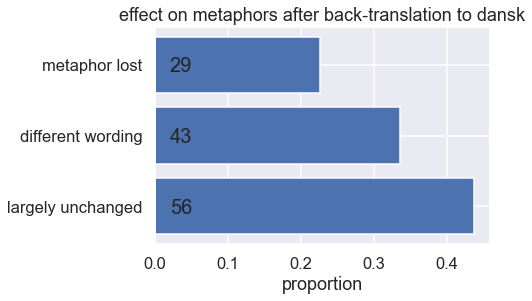

In [64]:
vc = memory2.value_counts()
vc_norm = vc / vc.sum()

vc.index = ["largely unchanged", "different wording", "metaphor lost"]

plt.barh(vc.index, vc_norm);
for i in range(3):
    plt.annotate(f"{vc[i]}", (0.02, i-0.1),fontsize=20)
plt.xlabel("proportion")
plt.title("effect on metaphors after back-translation to dansk");

In [52]:
vc_norm.round(4)

weitgehend unverändert    0.4375
Wortlaut verändert        0.3359
Metapher verloren         0.2266
dtype: float64

In [47]:
da = da.copy()
da["Backtranslation"] = memory2.to_list()
da

,index,Textstelle,Metapher,Kandidat,Nein,Metapher?,Fokus,Rahmen,Annotator,orig,lang,Backtranslation
3196,0,In beiden Fällen verwendet die Politik den grö...,3,1,0,Metapher,"{Krallen, Zähnen}","['der politische Körper', 'der politische Körp...","['B', 'K', 'A', 'GoldStandard']","""Der politische Körper verwendet in beiden Fä...",da,weitgehend unverändert
3213,17,Aber zur Zeit des Heraklit wurde die Saat dies...,4,0,0,Metapher,"{vergeblich, ausgestreute, Same, der, ..., aus...","['zu dieser Erkenntnis', 'zu dieser Erkenntnis...","['B', 'K', 'A', 'GoldStandard']",Aber zu Heraklits Zeit wurde der Same zu dies...,da,Wortlaut verändert
3220,24,"Bei ihnen stand alles auf einer Fläche, alles ...",4,1,0,Metapher,"{verwoben, irdischen, einen, Gewebe, Zettel, i...","['alles', 'das Gute und Heilige', nan, 'nur ei...","['B', 'A', 'P', 'K', 'GoldStandard']","Alles stand bei ihnen auf einer Fläche, alles...",da,Wortlaut verändert
3222,26,"Die vierte Operation, die wir erwähnen möchten...",5,0,0,Metapher,"{der, Werkstatt, Natur}","['der Natur', 'Der Natur', 'in die Werkstatt e...","['B', 'A', 'P', 'K', 'GoldStandard']",Als vierten Trieb möchten wir das Kausalitäts...,da,weitgehend unverändert
3228,32,"Auch er ist ein Kenner des Römischen Reiches, ...",5,0,0,Metapher,"{oder, Verholzung, Versteinerung}","['der christlichen Kirchen', 'der christlichen...","['B', 'A', 'P', 'K', 'GoldStandard']",Auch er ist ein genauer Kenner gerade der röm...,da,weitgehend unverändert
...,...,...,...,...,...,...,...,...,...,...,...,...
3973,777,"Welch ein Wunder, dass die Weisheit Israels ei...",3,1,0,Metapher,"{die, des, irdischen, Werkstatt, geheime, Ursp...","['im weiblichen Uterus', nan, 'die geheime Wer...","['K', 'B', 'P', 'GoldStandard']","[3]: Was Wunder, daß die israelitische Weishei...",da,weitgehend unverändert
3974,778,Da dieses grundlegende kosmologische Gesetz di...,4,0,0,Metapher,"{gewaltige, sichere, Labyrinth, Leitstern, der...","['der Welträthsel', 'der unsere monistische Ph...","['A', 'K', 'K', 'GoldStandard']",[4]: Indem dieses „kosmologische Grundgesetz“ ...,da,weitgehend unverändert
3982,786,Also verband er die gegenwärtige Generation mi...,5,4,0,Metapher,"{Zukunft, Dunkel, in, starrt, der, das, Vergan...","[nan, 'der Vergangenheit2', 'in die Morgenröte...","['K', 'B', 'P', 'P', 'GoldStandard']",[8]: So band er das Geschlecht von heute an da...,da,weitgehend unverändert
3985,789,"Es vergeht keine Woche, in der wir nicht von U...",3,0,0,Metapher,"{Haupt, schüttelt, „gesunde, Menschen-Verstand...","['richterlichen Urtheilen', 'bedenklich das Ha...","['A', 'K', 'GoldStandard']","[9]: Keine Woche vergeht, in der wir nicht von...",da,weitgehend unverändert


In [49]:
file = "dansk-backtranslation-check.csv"
path = "/".join( (cwd, folder, file) )
da.to_csv(path)

# Examples
find some good examples for each of the three cases:

In [65]:
for i, row in da[da.Backtranslation == "Wortlaut verändert"].iterrows():
    print(row.Fokus)
    print()
    print(row.Textstelle)
    print()
    print(row.orig)
    print("-"*80)

{'vergeblich', 'ausgestreute', 'Same', 'der', '...', 'ausgestreut'}

Aber zur Zeit des Heraklit wurde die Saat dieser Erkenntnis vergebens gesät.

 Aber zu Heraklits Zeit wurde der Same zu dieser Erkenntnis vergeblich ausgestreut. kenntnis vergeblich ausgestreut.
--------------------------------------------------------------------------------
{'verwoben', 'irdischen', 'einen', 'Gewebe', 'Zettel', 'in', 'breiten'}

Bei ihnen stand alles auf einer Fläche, alles war zu einem Stoff verwoben, das Gute und Heilige nur eine Hülle in einem breiten irdischen Stück Papier.

 Alles stand bei ihnen auf einer Fläche, alles war in ein Gewebe gewoben, das Gute und Heilige nur ein Einschlag in einen breiten irdischen Zettel.
--------------------------------------------------------------------------------
{'Majordomus', 'im', 'Hause', 'Aschenbrödel', 'Haus', 'Gewalt', 'der', 'das', 'Gewaltder'}

Denn das Gesetz bringt Ordnung und Gleichheit als unzertrennliche Begleiter mit sich, zunächst Aschenputtel 

translation:

Ein ganz ähnliches Schicksal ereilte die Römer; die Weltherrschaft entglitt ihnen, jüngere Menschen stiegen an die Spitze auf.

original:

Ein ganz ähnliches Schicksal war alsdann den Römern beschieden, die Zügel der Weltherrschaft entsanken ihnen, „jüngere“ Völker kamen obenauf.

ZÜGEL ALS METAPHER FEHLEN!!!

## Veränderter Wortlaut:

original:

In Wahrheit gingen nicht die germanischen Völker in sich zurück, sondern es verblich nun erst die letzte Abendröte antiker Civilisation

translation:

In Wahrheit haben sich die germanischen Völker nicht in sich selbst zurückgezogen, sondern erst jetzt verschwand das letzte Zwielicht der antiken Zivilisation.


-----
Unbekannte, sexuelle Selektion sitzt auch im Netz der Geschichte.

Unerkannt sitzt die geschlechtliche Zuchtwahl aber auch am Webstuhl der Geschichte.

-----

Denn es ist eine Schwäche des Zeitschicksals, ihm nicht ins ernste Gesicht sehen zu können.

Denn schwäche ist es: dem schicksal der Zeit nicht in sein ernstes Antlitz blicken zu können.

-----

Er gibt sich hin und vertraut sich dem Spiel der Wogen flüchtiger Gefühle ebenso an wie allen Zufällen des rastlosen Umherirrens.

[26]: Er gibt sich preis und vertraut sich dem Wellenspiele flüchtiger Gefühle ebenso an, wie er sich allen Zufällen ruhelosen Umherschweifens überliefert.